# Tarefa 1: Remoção de interferências de baixa frequência.	

Largura	 de	banda do sinal de interferência < 2 Hz

Para remover as interferencias mencionadas: Filtro Passa Alto

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt      #fazer o plot
import numpy as np

from scipy.signal import freqz, butter, lfilter #scipy conjunto de packs para calculo cientifico
# ver documeentacao: freqz?

# Visualização do sinal com ruido - ecg_lfn.dat

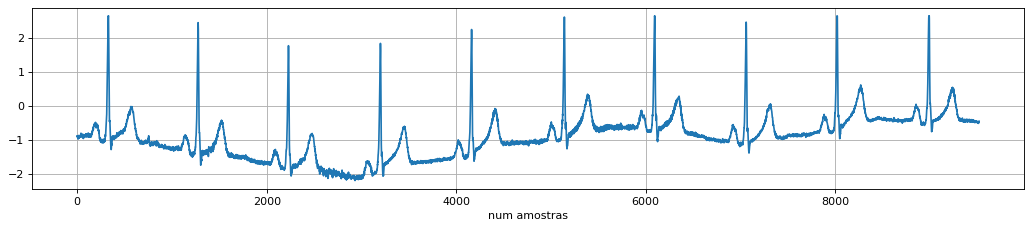

In [5]:
from matplotlib.pyplot import figure
# -- Sinal corrompido

figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
data = np.loadtxt('ecg_lfn.dat')
plt.plot(data,label='Sinal corrompido')
#plt.plot(t1, data, 'b')
plt.grid(True)
plt.xlabel('num amostras')
plt.show()


### Especificação do filtro

In [6]:
fs = 1000  # frequencia de amostragem
high_cut = 4  # freq de corte

# Filtro Passa-alto: Projecto do Filtro IIR


In [7]:
# Funcao de Suporte -> dou analogico e devolve digital
# devolve os coeficoentes de H(z) digital
def butter_highpass(high_cut, fs, order=5): # high_cut frequencia de corte da freq analogica em hertz e a ordem do meu filtro : 5
    '''Nota: a função butter assume que a frequência de corte da especificação foi
    normalizada pela frequência de Nyquist'''
    nyquist = 0.5* fs # freq nyquist é metade da freq de amostragem 
    high = high_cut / nyquist #normalizar em que a frequencia em pi = 1. high é digital e normalizada em pi que vale 1. freq correta = 1 * pi
    b, a = butter(order, high, btype='highpass') # butter -> calcula se eu der a ordem e a freq de corte e o tipo(high) ele retorna o b e a (butter?) em que b e a sao coeficientes do polinomio do numerador e denominador de H(z) ou H(s) -> depende, se tou a definir a freq do meu filtro analogico ou digital
    return b, a # flag analog(butter?) por defenicao é false. Se for V, b e a são do filtro analog em S. Se é falso é do filtro digital em Z
#butter?

#outra def de suporte
#dou sinal de entrada, freq de corte, fs e a ordem
#projeta o meu filtro b, a
def butter_high_filter(sinal, high_cut, fs, order=5):
    b, a = butter_highpass(high_cut, fs, order=order)
    y = lfilter(b, a, sinal) # passo o meu polinomio e o sinal entrada e implementa o filtro, dá o sinal filtrado
    return y
#lfilter?

# permite visualizar a resposta na frequencia
# passo varias ordens(para varios filtros) a f de corte e fs
def lp_freq_resp(orders, high_cut, fs):
    plt.figure(1) # crio figura
    plt.clf()  # clear da imagem ativa no momento
    for order in orders:   # iterador, para cada ordem calculo o polinomio, 
        b, a = butter_highpass(high_cut, fs, order=order)
        W, H = freqz(b, a, worN=2000)  #recebe o b e o a (polinomios), e o num de pontos, vai à representacao em z e retorna as amplitudes da resp do meu filtro
        # w -> amplitudes da resp do meu filtro H-> amostras do meu filtro e retorna as freq para qual calculo a ampli do meu filtro
        plt.axis([0, 10, 0, 1.2])
        plt.plot((fs * 0.5 / np.pi) * W, abs(H), label="order = %d" % order) # abs(H) modulo da resp do meu filtro
        # w omega é de freq digital vou converter na freq analogica e faco o plot para aquela ordem
    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)') # desenho uma linha que passa na (sqtr(0.5)) = -3dB -> desenho uma linha que passa em -3dB porque é a posicao da minha freq de corte
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

### Resposta em frequencia 

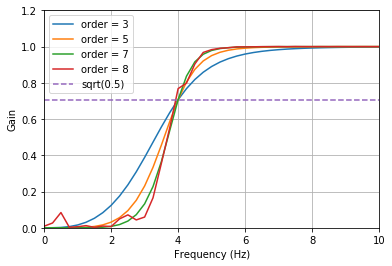

In [8]:
lp_freq_resp([3,5,7,8], 4, fs) # azul 3 ordem (...) a fc é igual em todas 

Da observação da resposta em frequência, e um vez que a ordem 8 apresenta oscilações, a ordem escolhida para o presente filtro é a ordem 7. Com esta ordem o filtro apresenta uma banda de transição por volta de 2Hz, atenua as frequencias inferiores a 2 Hz e qpresenta um ganho unitário na banda passante

### Diagrama de Polos e Zeros

(7, 7)

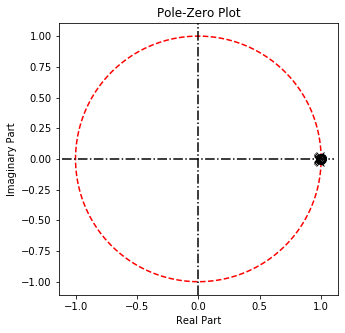

In [11]:
from plots import zplane # vou ao ficheiro

order = 7

b, a = butter_highpass(high_cut, fs, order)
zplane(b, a)

Uma vez que os 7 polos e 7 zeros encontram-se no circulo unitario, o presente filtro é realizável

### Filtragem do Sinal

Ordem = 7; 
Frequencia de corte = 4 Hz; 
Filtro IIR passa alto;

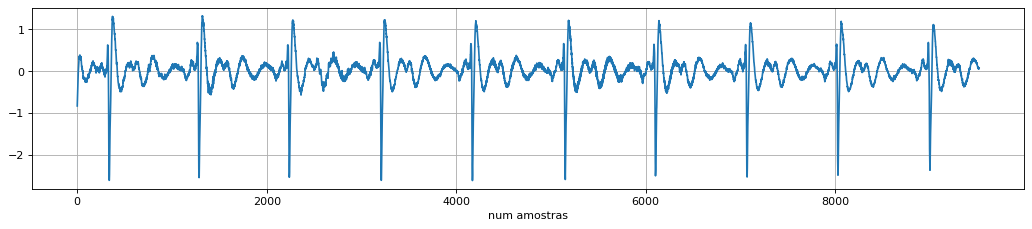

In [12]:
# -- Filtragem do sinal
# quero recuperar- eliminar a componente inferior a 2 Hz
# passa alto

order = 8
high_cut = 4

y = butter_high_filter(data, high_cut, fs, order)  #sinal, high_cut, fs, order=5

figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y)
plt.grid(True)
plt.xlabel('num amostras')
plt.show()

# Filtro Passa-alto: Projecto do Filtro FIR

Nos filtros FIR, a resposta aproximada na frequencia é obtida diretamente.

## Especificação

O filtro ideal no qual partimos de base para a projeção de um filtro realizável é um filtro passa alto com wc=2 Hz. Foram realizados dois testes com as janelas de Hamming e de Kaiser

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.signal as ss

nyquist = fs / 2.0
high_cut = 4
high = high_cut / nyquist # normalizada
width = 5 / nyquist # largura -> normalizada - banda de transição
ripple_db = 60.0   # ripple -> 


## Janela de Hamming

In [14]:
num_taps = 25 # coeficientes
taps = ss.firwin(num_taps, high, window='hamming', pass_zero='highpass') #firwin -> FIR
#num_taps -> ordem 
#low -> freq normalizada
#pass_zero -> passa baixo true passa banda true ss.firwin?
s_filtered = ss.lfilter(taps, 1, data) # para filtrar -> lfilter(b,a)
# b - taps -> coef do numerador
# 1 -> coef do denominador
# s -> sinal entrada

### Resposta em frequencia do FIR com a janela de Hanning

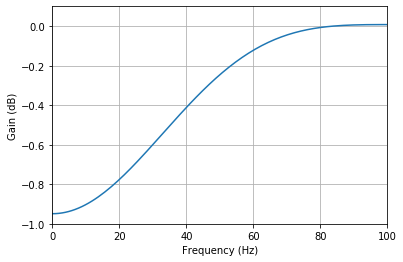

In [15]:
W, H = ss.freqz(taps, 1) # passo os coeficientes

plt.figure()
plt.axis([0, 100, -1, 0.1])
plt.plot((fs * 0.5 / np.pi) * W, 20 * np.log10(abs(H)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid(True)
# resp visto nos slides

## Janela de Keiser

In [16]:
# calcular o num taps e o B -> kaiserord
#     passo a atenuacao e a largura do filtro banda e fornece o B porque as freq estao normalizadas
num_taps, beta = ss.kaiserord(ripple_db, width)
#calculo a ordem e o B

taps = ss.firwin(num_taps, high, window=('kaiser', beta), pass_zero='highpass') # calculo os coeficientes -> taps
# ele vai apanhar o filtro ideal e multipicar a sua resp impulsional pela janela consoante se é pass baixo, alto ...
s_filtered = ss.lfilter(taps, 1.0, data) # filtro o meu sinal

### Resposta em frequencia do FIR com a janela de Keiser

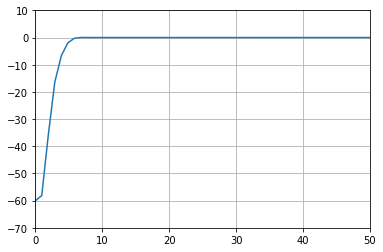

In [18]:
W, H = ss.freqz(taps, [1])

plt.figure()
plt.axis([0, 50, -70, 10])
plt.plot((fs * 0.5 / np.pi) * W, 20 * np.log10(abs(H)))
plt.grid()

# atenuacao de -60 dB está certo

##### A janela de Keiser apresentou melhores resultados na implementação do filtro. Deste modo, para o projeto do filtro FIR foi utilizado a janela de Kaiser em detrimento da janela de Hanning

### Diagrama de Polos e Zeros

(726, 363)

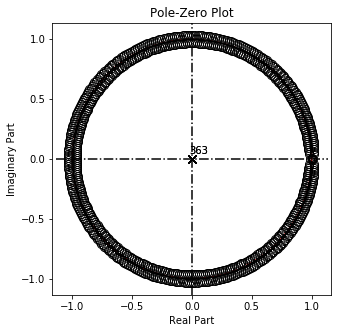

In [20]:
from plots import zplane

zplane(taps, [1])

# tem muitos mais polos e zeros

O presente diagrama de polos e zeros apresenta um grande número de zeros (726) e de polos (363). A cada zero no interior do circulo unitário corresponde um zero no exterior do circulo unitário. No centro do referencial encontra-se a totalidade dos 363 polos.

### Filtragem do Sinal

Janela de Keiser; 
Ordem = 726; 
Frequencia de corte = 4 Hz; 
Filtro FIR passa alto;
largura da banda de transição = 5 Hz; 
ripple = 60 dB;

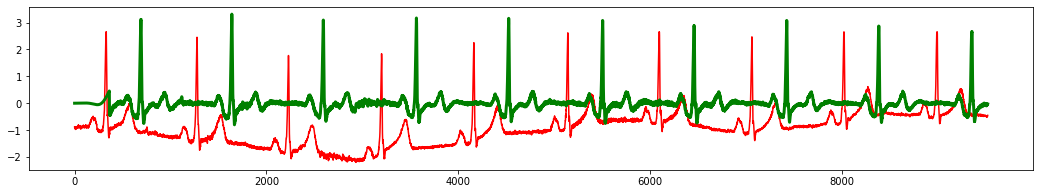

In [31]:
plt.figure(figsize=(18, 3))
plt.plot(data, 'r')
_ = plt.plot(s_filtered, 'g', linewidth=3)

# verde o sinal filtrado
# vermelho o sinal original - corrompido


# Filtro IIR sintonizado

$$H(z) = \frac{1 - z^{-1}}{1 - a z^{-1}}$$

Sendo o filtro sintonizado, é possível mudar o polo para compensar o efeito do zero. Ou seja, como o zero é fixo, é possível sintonizar (alterar) o valor do polo.

O filtro sintonizado apenas tem um zero = 1. O valor do alfa não pode ser um, uma vez que assim o fosse, anulava o efeito do zero e não cortava nenhuma frequencia no sinal. Deste modo, o valor escolhido para o alfa é de 0.99 .

(1, 1)

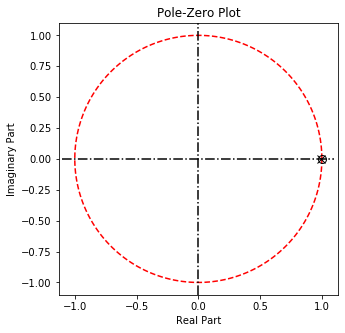

In [64]:
# b -> polinomios do numerador
# a -> polinomio do denominador 
# tenho que definir 
b = [1, -1] # coef de ordem 0
a = [1, -0.99] # 2 coeficeientes
zplane(b,a) 


# Filtro IIR vs Filtro FIR

Através da visualização do sinal filtrado pelos filtros IIR e FIR, o sinal filtrado através do filtro FIR apresentou menos distorções no sinal filtrado, sendo o escolhido para o projeto do filtro passa-alto. 


# Filtro sintonizado vs Filtro FIR 

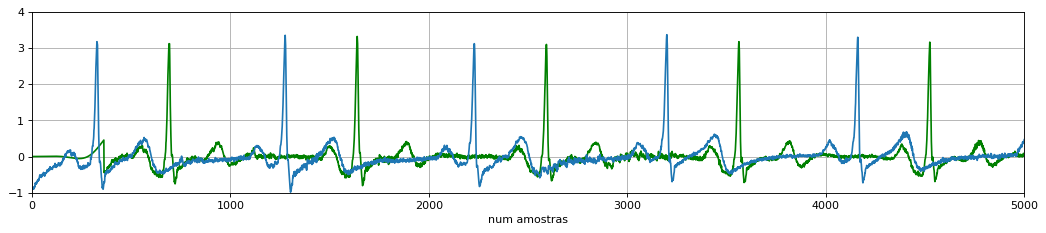

In [89]:
y = lfilter(b, a, data)  # filtro sintonizado

figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
plt.axis([0, 5000, -1, 4])

_ = plt.plot(s_filtered, 'g')
plt.plot(y)
plt.grid(True)
plt.xlabel('num amostras')
plt.show()

No gráfico anterior, a verde é possível observar o o sinal filtrado pelo filtro FIR e a azul o sinal filtrado através do filtro sintonizado, com alfa = 0.99. 

Os sinais filtrados são muito semelhantes, não sendo possível escolher com exatidão qual o melhor. A única diferença nos dois sinais é a fase inicial. O sinal filtrado pelo filtro FIR nas primeiras amostras estão atrasadas.